**Going to practice with motor data set from mne dataset example at *mne.datasets.fnirs_motor.data_path()***

This dataset contains a single subject recorded at Macquarie University. It has optodes placed over the motor cortex. 

**There are three conditions:**

1. tapping the left thumb to fingers

2. tapping the right thumb to fingers

3. a control where nothing happens

The tapping lasts 5 seconds, and there are 30 trials of each condition.

In [2]:
import os.path as op
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import compress
from numpy.testing import assert_allclose

import mne
import pysnirf2

MODULE_PATH = op.join(os.getcwd(), 'mne_nirs\\__init__.py')
MODULE_NAME = 'mne_nirs'

import importlib
import sys
spec = importlib.util.spec_from_file_location(MODULE_NAME, MODULE_PATH)
module = importlib.util.module_from_spec(spec)
sys.modules[spec.name] = module 
spec.loader.exec_module(module)



from mne.io import read_raw_nirx, read_raw_snirf
from mne_nirs.io import write_raw_snirf

NIRS can be performed using methods in continuous wave (CW) (constant illumination), time domain (TD) (pulsed illumination and time-resolved detection), or frequency domain (FD) (intensity-modulated illumination and phase-resolved detection). CW techniques are the most common.

In [3]:

#Get path to local copy of fnirs_motor dataset
fnirs_data_folder = mne.datasets.fnirs_motor.data_path()
print(fnirs_data_folder)

#returns path to file with data for 1st participant
#cw_amplitude means "continuous-wave amplitude"--i.e. the intensity
#of the light being shone doesn't change
fnirs_cw_amplitude_dir = op.join(fnirs_data_folder, 'Participant-1')


#read in NIRX fNIRS recording with path to the data
#documetation of Raw objects at https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw
raw_intensity = mne.io.read_raw_nirx(fnirs_cw_amplitude_dir, verbose = True)

#load raw data
raw_intensity.load_data()


C:\Users\taubm\mne_data\MNE-fNIRS-motor-data
Loading C:\Users\taubm\mne_data\MNE-fNIRS-motor-data\Participant-1
Reading 0 ... 23238  =      0.000 ...  2974.464 secs...


<RawNIRX | Participant-1, 56 x 23239 (2974.5 s), ~10.0 MB, data loaded>

Loading C:\Users\taubm\Desktop\mne-nirs\test_raw.snirf
Opening raw-browser...


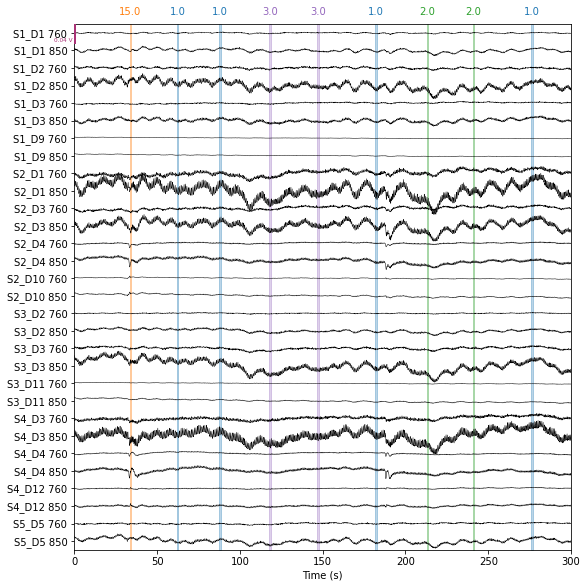

In [11]:
#write data from NIRX file to snirf file for mne-nirs package
write_raw_snirf(raw_intensity, 'test_raw.snirf')

#read back the new snirf file
snirf_intensity = read_raw_snirf('test_raw.snirf')

#make sure the data from the original file and the SNIRF file
#have the same values
assert_allclose(raw_intensity.get_data(), snirf_intensity.get_data())
snirf_intensity.plot(n_channels=30, duration=300, show_scrollbars=False);

In [8]:

# %%
# Validate SNIRF File
# -------------------
#
# To validate that a file complies with the SNIRF standard you should use the
# official SNIRF validator from the Boston University Neurophotonics Center
# called ``pysnirf2``. Detailed instructions for this program can be found at
# https://github.com/BUNPC/pysnirf2. Below we demonstrate that the files created
# by MNE-NIRS are compliant with the specification.

result = pysnirf2.validateSnirf('test_raw.snirf')
assert result.is_valid()
result.display()


Found 304 OK      (hidden)
Found 522 INFO    (hidden)
Found 0 WARNING
Found 0 FATAL  

File is VALID


### now I have the NIRX format (raw intensity) and the snirf format data (snirf_intensity)

Opening raw-browser...


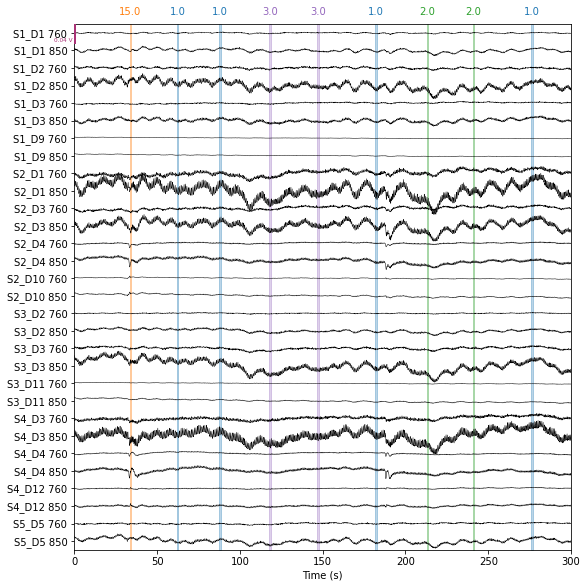

In [10]:
raw_intensity.plot(n_channels=30, duration=300, show_scrollbars=False);

based on the description of the experiment, "First, we attribute more meaningful names to the trigger codes which are stored as annotations. Second, we include information about the duration of each stimulus, which was 5 seconds for all conditions in this experiment. Third, we remove the trigger code 15, which signaled the start and end of the experiment and is not relevant to our analysis."


In [25]:
raw_intensity.describe()

raw_intensity.annotations.set_durations(5)

raw_intensity.set_annotations('Start', 'Control', 'Tapping/Left', 'Tapping/Right')

#.rename(1.0':'Control',\
#                                 '2.0':'Tapping/Left',\
 #                                '3.0':'Tapping/Right'})

unwanted = np.nonzero(raw_intensity.annotations.description == 'Start')
raw_intensity.annotations.delete(unwanted)

<RawNIRX | Participant-1, 56 x 23239 (2974.5 s), ~10.0 MB, data loaded>
ch  name        type                unit        min         Q1     median         Q3        max
 0  S1_D1 760   FNIRS_CW_AMPLITUDE  V          0.09       0.09       0.10       0.10       0.10
 1  S1_D1 850   FNIRS_CW_AMPLITUDE  V          0.17       0.19       0.19       0.19       0.21
 2  S1_D2 760   FNIRS_CW_AMPLITUDE  V          0.22       0.22       0.23       0.23       0.24
 3  S1_D2 850   FNIRS_CW_AMPLITUDE  V          0.58       0.61       0.61       0.62       0.65
 4  S1_D3 760   FNIRS_CW_AMPLITUDE  V          0.10       0.11       0.12       0.12       0.13
 5  S1_D3 850   FNIRS_CW_AMPLITUDE  V          0.26       0.28       0.29       0.30       0.32
 6  S1_D9 760   FNIRS_CW_AMPLITUDE  V          0.07       0.07       0.07       0.07       0.08
 7  S1_D9 850   FNIRS_CW_AMPLITUDE  V          0.11       0.11       0.11       0.12       0.13
 8  S2_D1 760   FNIRS_CW_AMPLITUDE  V          0.53       0.59  

TypeError: set_annotations() takes from 2 to 4 positional arguments but 5 were given

Opening raw-browser...


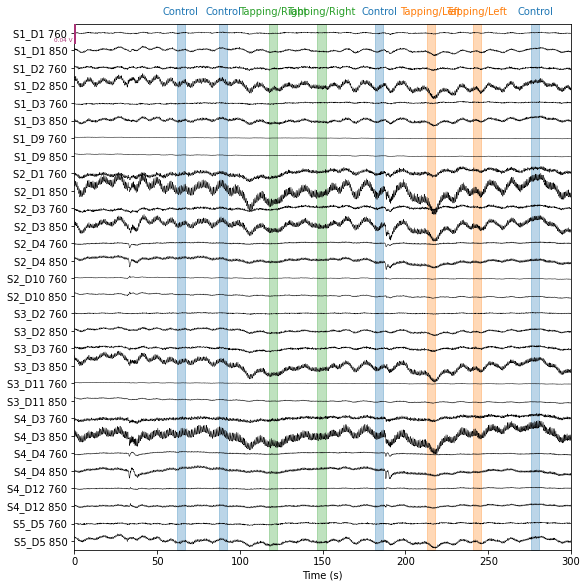

In [26]:
raw_intensity.plot(n_channels=30, duration=300, show_scrollbars=False);

In [46]:
#important: finally how to get the channel names
raw_intensity.ch_names

#to get all data
#raw_intensity._data

['S1_D1 760',
 'S1_D1 850',
 'S1_D2 760',
 'S1_D2 850',
 'S1_D3 760',
 'S1_D3 850',
 'S1_D9 760',
 'S1_D9 850',
 'S2_D1 760',
 'S2_D1 850',
 'S2_D3 760',
 'S2_D3 850',
 'S2_D4 760',
 'S2_D4 850',
 'S2_D10 760',
 'S2_D10 850',
 'S3_D2 760',
 'S3_D2 850',
 'S3_D3 760',
 'S3_D3 850',
 'S3_D11 760',
 'S3_D11 850',
 'S4_D3 760',
 'S4_D3 850',
 'S4_D4 760',
 'S4_D4 850',
 'S4_D12 760',
 'S4_D12 850',
 'S5_D5 760',
 'S5_D5 850',
 'S5_D6 760',
 'S5_D6 850',
 'S5_D7 760',
 'S5_D7 850',
 'S5_D13 760',
 'S5_D13 850',
 'S6_D5 760',
 'S6_D5 850',
 'S6_D7 760',
 'S6_D7 850',
 'S6_D8 760',
 'S6_D8 850',
 'S6_D14 760',
 'S6_D14 850',
 'S7_D6 760',
 'S7_D6 850',
 'S7_D7 760',
 'S7_D7 850',
 'S7_D15 760',
 'S7_D15 850',
 'S8_D7 760',
 'S8_D7 850',
 'S8_D8 760',
 'S8_D8 850',
 'S8_D16 760',
 'S8_D16 850']

### Select good channels

First we remove channels that are too close together (short channels) to detect a neural response (less than 1 cm distance between optodes). These short channels can be seen in the figure above. To achieve this we pick all the channels that are not considered to be short.

**channels too close together aren't good**

Opening raw-browser...


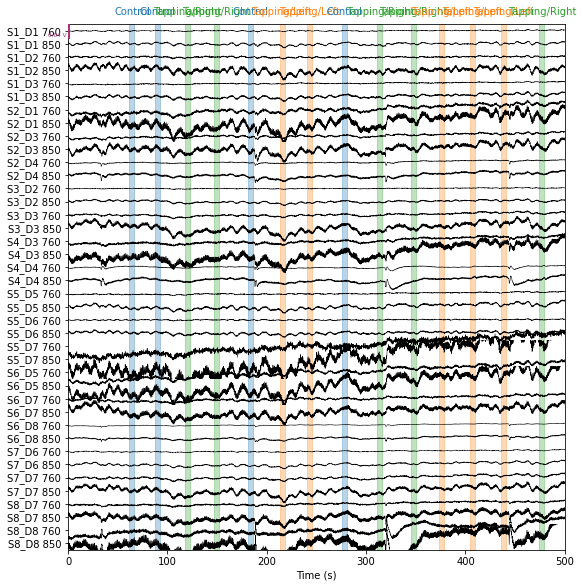

In [89]:
#picks_types picks the channels by type and name.
#here this picks all fnirs channels
picks = mne.pick_types(raw_intensity.info, fnirs=True)

#gives the distances between detectors
dists = mne.preprocessing.nirs.source_detector_distances(
    raw_intensity.info, picks=picks)

#selects the channels with detectors creater than 1 cm apart
raw_intensity.pick(picks[dists > 0.01])

#plot
raw_intensity.plot(n_channels=len(raw_intensity.ch_names),
                   duration=500, show_scrollbars=False);

In [76]:
#to convert from "raw intensity" to "optical density",
#remove negative values--change to their absolute values
#and make sure all values are > 0

raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)

#^the function is at https://github.com/mne-tools/mne-python/blob/maint/0.24/mne/preprocessing/nirs/_optical_density.py
#It was harder to understand than I thought

#^maybe figure out how to do this

raw_od.plot(n_channels=len(raw_od.ch_names),
            duration=500, show_scrollbars=False);


# Now evaluate the data quality